# **🔹 Step 1: Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# **🔹 Step 2: Load the Dataset**

In [5]:
from kagglehub import dataset_download

path = dataset_download("shivamb/netflix-shows")
df = pd.read_csv(f"{path}/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **🔍 Task Breakdown (EDA)**

# **✅ 1. Parse date_added to extract year**

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# **✅ 2. Distribution of content over the years**

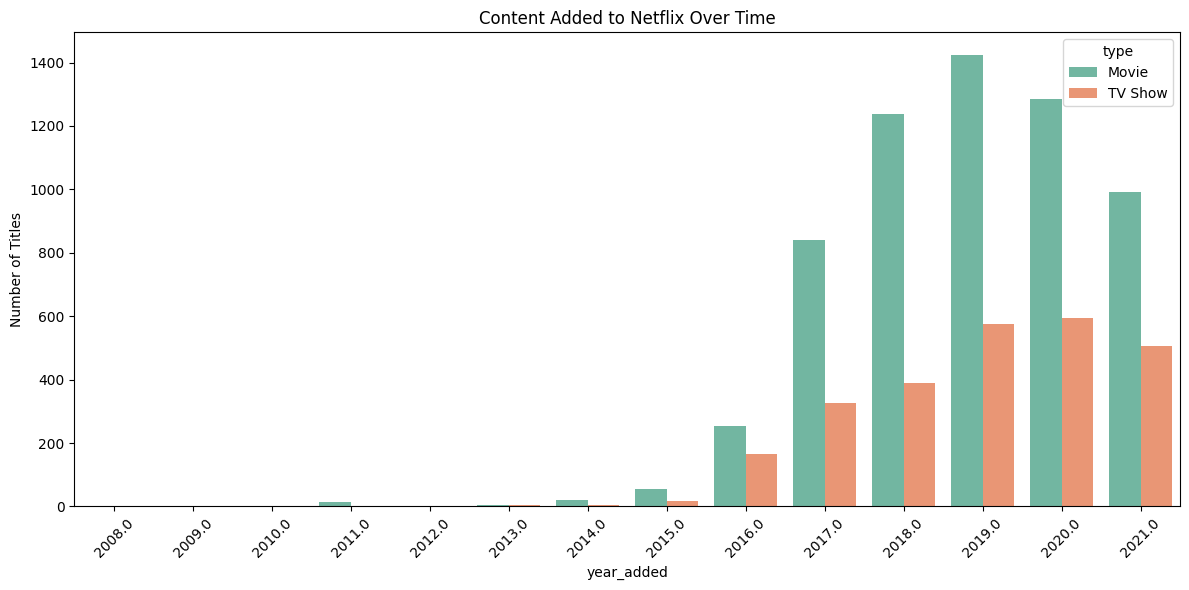

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year_added', hue='type', palette='Set2')
plt.title("Content Added to Netflix Over Time")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

# **✅ 3. Top 10 Countries by Content Volume**

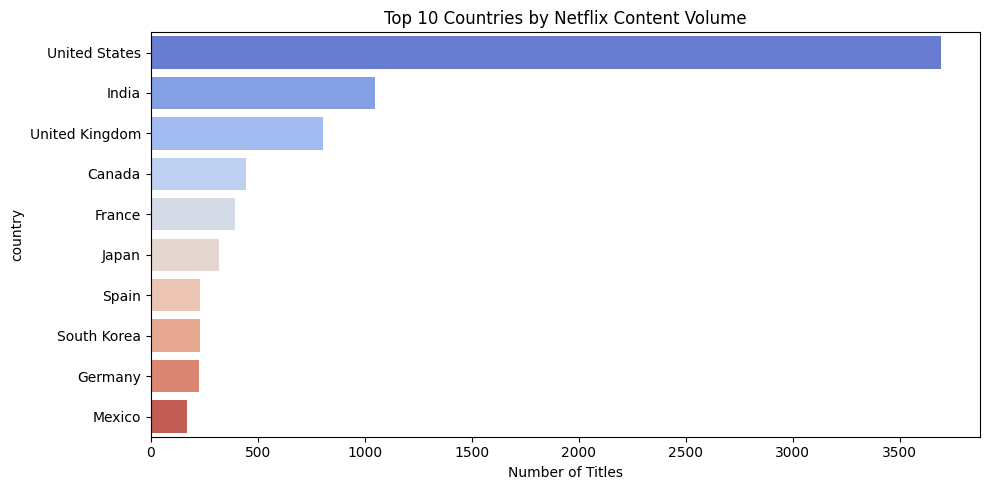

In [8]:
top_countries = df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Netflix Content Volume")
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()

# **✅ 4. Genre Classification (Top 10 Genres)**

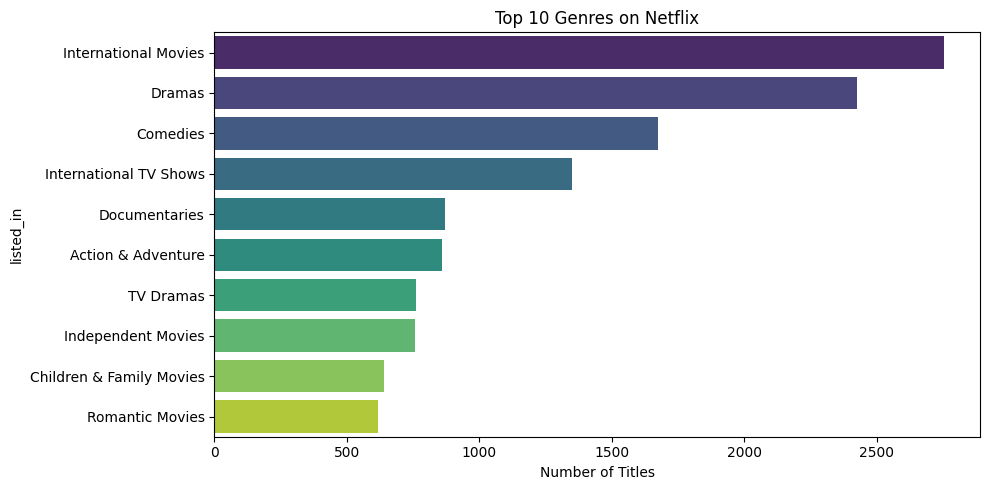

In [9]:
top_genres = df['listed_in'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()

# **✅ 5. Content Distribution by Type**

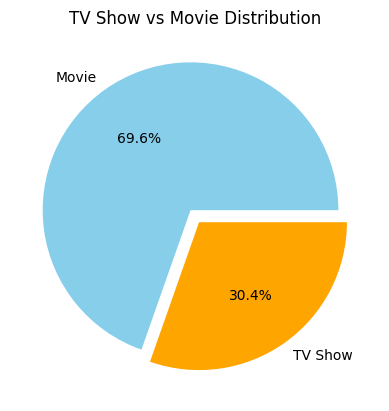

In [10]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], explode=(0.05, 0.05))
plt.title("TV Show vs Movie Distribution")
plt.ylabel("")
plt.show()

# **🧠 Additional Insights**

# **1. 🎨 Word Cloud of Titles**

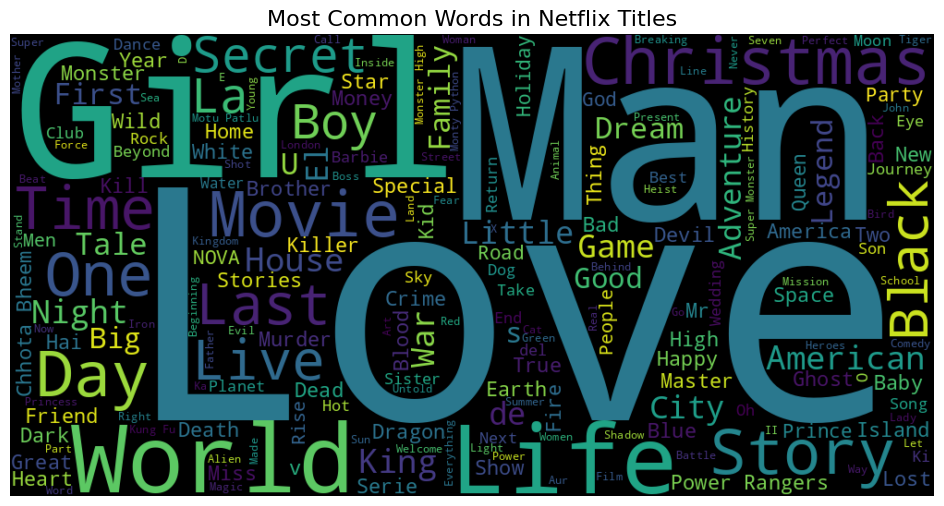

In [11]:
from wordcloud import WordCloud, STOPWORDS

title_text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='black', stopwords=STOPWORDS).generate(title_text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix Titles", fontsize=16)
plt.show()

# **2. 🧊 Correlation Heatmap**

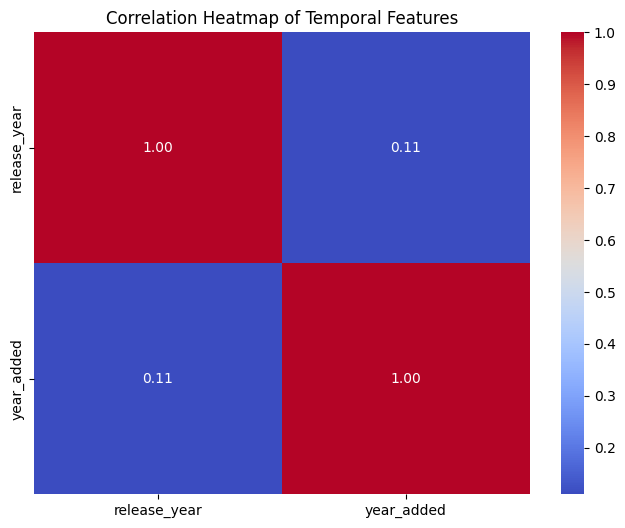

In [12]:
# Convert 'release_year' to numeric if needed
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
corr_data = df[['release_year', 'year_added']].dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Temporal Features")
plt.show()

# **3. 🎯 Genre Clustering (Unsupervised)**

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


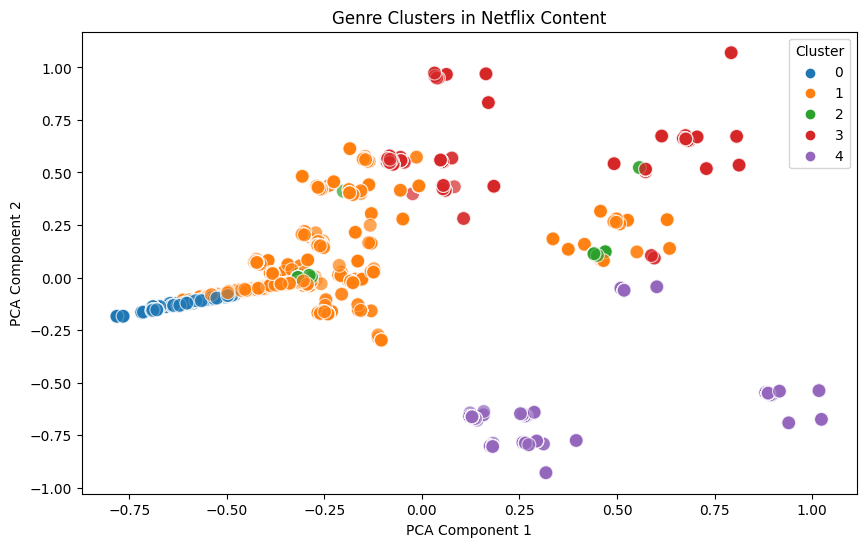

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Vectorize genres
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','), stop_words='english')
X = vectorizer.fit_transform(df['listed_in'].fillna(''))

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

df['genre_cluster'] = clusters

# Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=clusters, palette='tab10', s=100, alpha=0.7)
plt.title("Genre Clusters in Netflix Content")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# **📄 Project Summary: Netflix Titles Dataset Analysis**

# **🎯 Objective**

The objective of this project was to analyze trends in Netflix’s content offerings over time, with a focus on understanding patterns in show/movie types, genres, countries, and the platform’s content expansion strategy.

# **📚 Dataset**

Source: Kaggle – shivamb/netflix-shows

Fields Used: type, title, country, date_added, release_year, listed_in

# **✅ Key Analyses Performed**

| **Aspect**                      | **Description**                                                                     |
| ------------------------------- | ----------------------------------------------------------------------------------- |
| **Temporal Trends**             | Parsed `date_added` to extract `year_added` and visualized yearly content growth.   |
| **Content Type Distribution**   | Analyzed the ratio of **TV Shows vs Movies** added to Netflix.                      |
| **Country-wise Content Volume** | Identified **Top 10 countries** contributing the most content to Netflix.           |
| **Genre Analysis**              | Used multi-label parsing of `listed_in` to extract and visualize **Top 10 genres**. |
| **Textual Insight**             | Generated a **word cloud** to highlight most frequent words in content titles.      |
| **Date Correlation**            | Correlation heatmap between `release_year` and `year_added` for temporal insights.  |
| **Genre Clustering**            | Applied **K-Means clustering** on genres using text vectorization and PCA.          |


# **🧠 Skills & Concepts Practiced**

| **Skill Area**      | **Details**                                                                   |
| ------------------- | ----------------------------------------------------------------------------- |
| **Text Parsing**    | Used `str.split()`, `explode()`, and string operations on multi-label fields. |
| **Date Handling**   | Converted date strings to datetime and extracted useful features.             |
| **Visualization**   | Employed Seaborn, Matplotlib, and WordCloud for storytelling and insights.    |
| **Unsupervised ML** | Used CountVectorizer and KMeans to cluster similar content genres.            |


# **📌 Key Insights**

Netflix saw a major increase in content additions post-2015.

The USA dominates content production, followed by India and the UK.

Popular genres include International TV Shows, Dramas, and Comedies.

Clustering revealed natural groupings of content genres, indicating strong thematic similarities.